# ***`Decision Boundaries`***

- #### **The aim of this notebook is to understand or visualize the decision boundaries for the below tasks:**
    - #### **Comparing different classifiers**
    - #### **Evaluating classifier for overfitting or underfitting**

In [1]:
import os
import sys
import shutil

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from itertools import product

from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

%matplotlib inline

In [2]:
# Loading some example data
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

In [3]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('svc', SVC(gamma=0.1, probability=True))],
                 voting='soft', weights=[2, 1, 2])

In [4]:
# grid cell size
h = .02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#### **Q. How Numpy ravel works?**

In [5]:
xx

array([[3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       ...,
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88]])

In [6]:
xx.shape

(395, 280)

In [7]:
pd.DataFrame(xx)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88
1,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88
2,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88
3,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88
4,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88
391,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88
392,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88
393,3.3,3.32,3.34,3.36,3.38,3.4,3.42,3.44,3.46,3.48,...,8.7,8.72,8.74,8.76,8.78,8.8,8.82,8.84,8.86,8.88


In [8]:
xx.ravel()

array([3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88])

In [9]:
xx.ravel().shape

(110600,)

In [10]:
pd.DataFrame(xx.ravel())

,0
0,3.30
1,3.32
2,3.34
3,3.36
4,3.38
...,...
110595,8.80
110596,8.82
110597,8.84
110598,8.86


#### **Q. How np.c_ and np.r_ works?**

In [11]:
x1 = np.array([[1,2],[3,5]])
x2 = np.array([[7,8],[9,2]])
print(x1.shape,x2.shape)
x1,x2

(2, 2) (2, 2)


(array([[1, 2],
        [3, 5]]),
 array([[7, 8],
        [9, 2]]))

### **np.c_**
##### - **It concatenates the array-1 and array-2 column wise**

In [12]:
print(np.c_[x1,x2].shape)
np.c_[x1,x2]

(2, 4)


array([[1, 2, 7, 8],
       [3, 5, 9, 2]])

### **np.r_**
##### - **It concatenates the array-1 and array-2 row wise**

In [13]:
print(np.r_[x1,x2].shape)
np.r_[x1,x2]

(4, 2)


array([[1, 2],
       [3, 5],
       [7, 8],
       [9, 2]])

### **Different Classifiers Decision Boundaries**

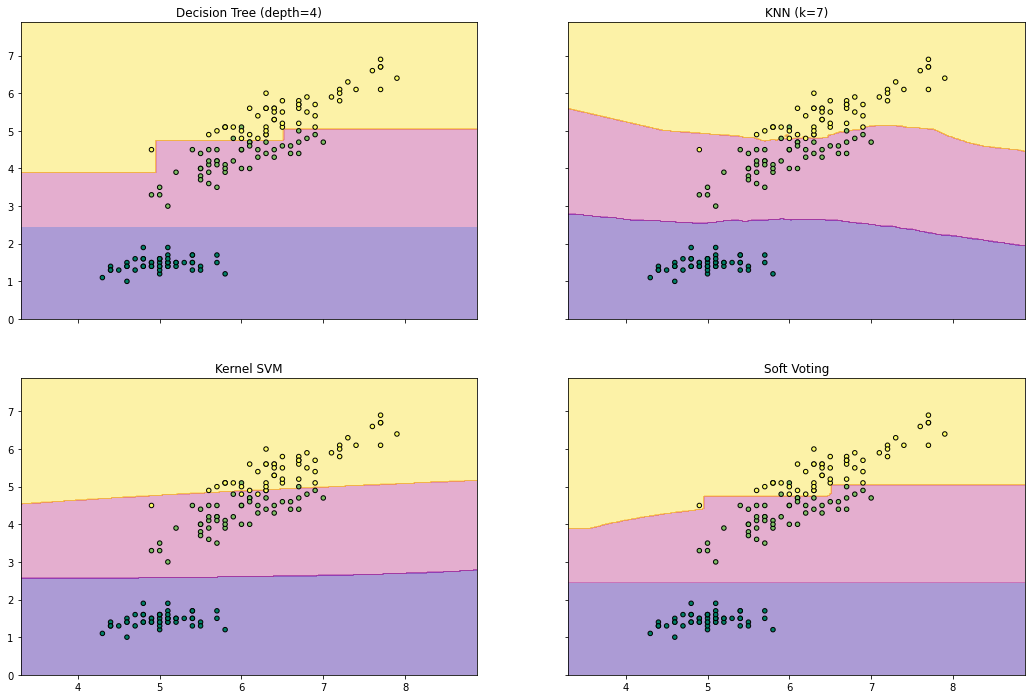

In [14]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(18, 12)) ## 4 Subplots with shared x and y axis 

for idx, clf, tt in zip(product([0, 1], [0, 1]),  ## This gives the cartesian product [0,0],[0,1],[1,0],[1,1] 
                        [clf1, clf2, clf3, eclf], ## These are all the above 4 classifier
                        ['Decision Tree (depth=4)', 'KNN (k=7)', 'Kernel SVM', 'Soft Voting']): ## Graph titles

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) ## This first flattens the xx and yy then concatenates the flattened arrays column wise
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4,cmap='plasma')
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k',cmap='summer')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### **Decision Boundaries of K-Nearest Neighbors**

In [15]:
# Loading some example data
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# grid cell size
h = .02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

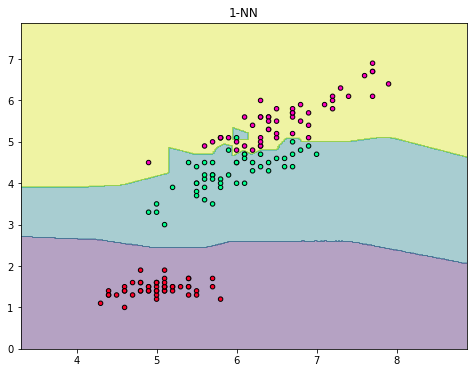

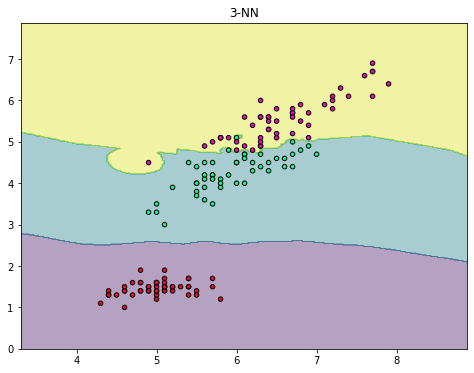

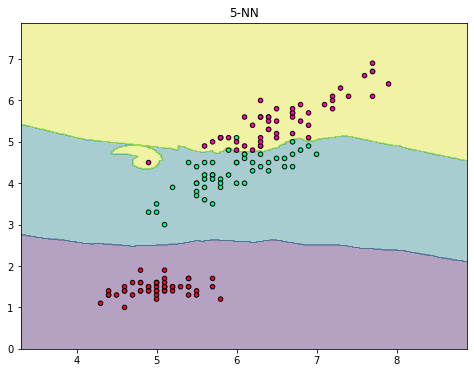

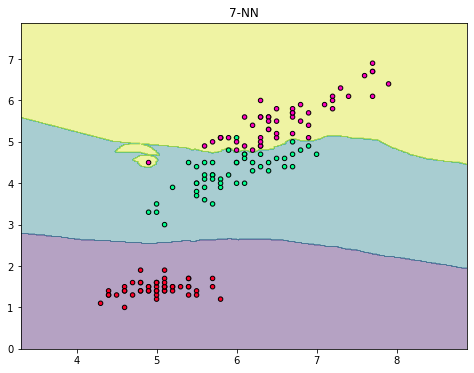

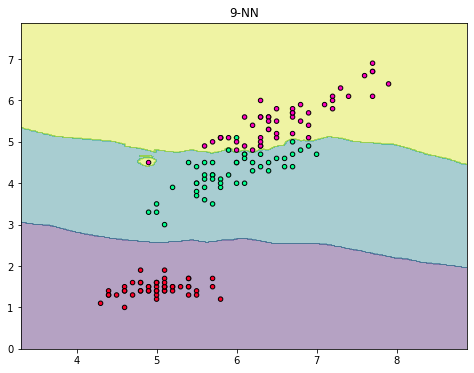

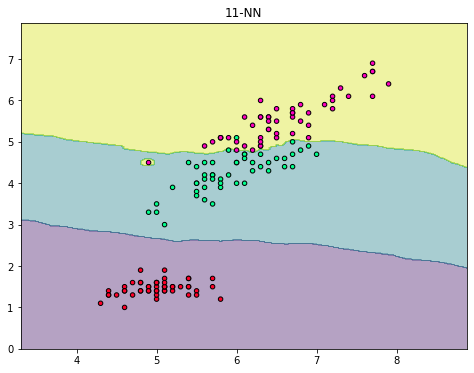

In [16]:
for k in range(1,12)[::2]:                  ## Generating an odd numbers list of NN from 1 to 11
    f, axarr = plt.subplots(1,1, figsize=(8, 6))    ## Defining a subplot with 1 row and 1 col 
    clf11 = KNeighborsClassifier(n_neighbors=k,weights='distance',algorithm='kd_tree',leaf_size=40)   ## Instantiating the KNN algo
    clf11.fit(X,y)        
    Z = clf11.predict(np.c_[xx.ravel(), yy.ravel()])  ## This provide the flattened array for prediction
    Z = Z.reshape(xx.shape)
    axarr.contourf(xx, yy, Z, alpha=0.4,cmap='viridis')  ## This plots the countour from the grid
    axarr.scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k',cmap='gist_rainbow')  ## This creates the scatter plots of data observations
    axarr.set_title('{}-NN'.format(k))
    plt.show()

## **Work with some random shaped datasets**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
from plotly import subplots

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs, make_checkerboard
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

## ***`Decision boundaries on some random shaped toy datasets`***

In [18]:
random_shaped_toy_datasets = [make_moons(noise=0.25, random_state=41,n_samples=500),
                              make_circles(noise=0.2, factor=0.5, random_state=23,n_samples=500),
                              make_blobs(random_state=44,n_samples=500)]

classifier_names = ["Decision Tree","Random Forest", "ExtraTrees", "KNN"]

# Creating a list with 4 classifiers
diff_classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=20, max_features=1),
    ExtraTreesClassifier(),
    KNeighborsClassifier(n_neighbors=9,weights='distance',algorithm='kd_tree',leaf_size=40)]

In [33]:
def plot_decision_boundaries(datasets,clf_names,classifiers,test_label=False):
    """
    Description : This function is created for generating the decision boundaries of various classifiers.
    
    Inputs : It accepts the below parameters:
        1. datasets --> list
            This is the list which contains the pandas dataframe object
        2. clf_names --> list
            List containing names of classifiers
        3. classifiers --> list
            List containing actual classifier objects
        4. test_label --> boolean
            Flag that handles whether test data points to be generated
    
    Return : None
    """
    figure = plt.figure(figsize=(20, 18))     # Defining figure size
    h = 0.02     # Defining the cell size of a grid
    i = 1        # Counter for iterating over datasets
    for ds in datasets:
        # Scaling dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

        # Creating the data point grid
        x_min, x_max = X[:, 0].min() -.5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() -.5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # First, only plotting the dataset
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i) # i means index starts at 1 in upper left corner & increases to the right.
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.7)
        # Plot the testing points
        if test_label:
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='gist_rainbow', alpha=0.6)
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        # Iterate over classifiers
        for name, clf in zip(clf_names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)  # Calculating the accuracy

            # Inplace of below if else statement we can also use the classifier predict method.
            # Decision function tells on which side of the hyperplane(generated by the classifier) a point is lying (and how distant it is)
            # Mathematically we can say that it is the result of dot product it +ve then same side of unit vector else -ve
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            Z = Z.reshape(xx.shape)  # The height values over which the contour is drawn.
            # Put the result into a color plot
            ax.contourf(xx, yy, Z, cmap='summer', alpha=.8)
            # Plot the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.6, linewidths=0.6, edgecolors="k")
            # Plot the testing points
            if test_label:
                ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='gist_rainbow', alpha=0.6)
                
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .2, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right', color='k')
            i += 1

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()

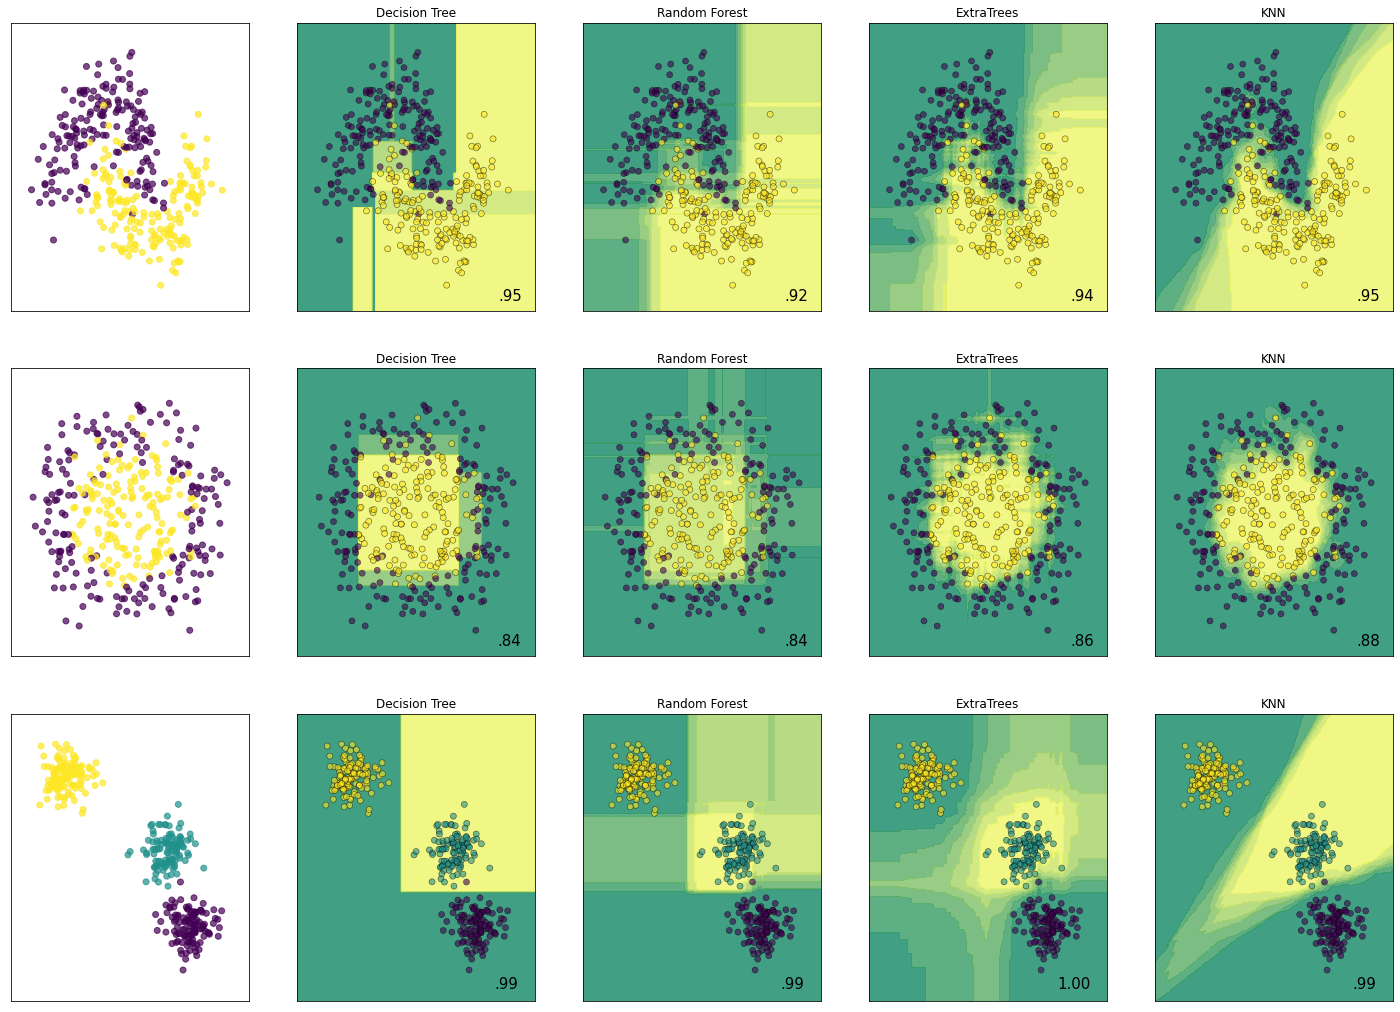

In [34]:
plot_decision_boundaries(datasets=random_shaped_toy_datasets,
                         clf_names=classifier_names,
                         classifiers=diff_classifiers)

In [38]:
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
h = .02  # step size in the mesh

X = StandardScaler().fit_transform(X)


# Train two Random Forests. One with normal reasonable parameters and the other with overfitting
rf_trees = RandomForestClassifier(max_depth=4, 
                               n_estimators=20, 
                               random_state=0)
rf_trees.fit(X, y)

rf_trees_overfit = RandomForestClassifier(max_depth=50, 
                                       n_estimators=5, 
                                       random_state=0)
rf_trees_overfit.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h)
                     , np.arange(y_min, y_max, h))
y_ = np.arange(y_min, y_max, h)

Z = rf_trees.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


fig = subplots.make_subplots(rows=1, cols=2,
                          subplot_titles=("Random Forest (Depth = 4)",
                                          "Random Forest (Depth = 50)")
                         )

trace1 = go.Heatmap(x=xx[0], y=y_, z=Z,
                  colorscale='Viridis',
                  showscale=False)

trace2 = go.Scatter(x=X[:, 0], y=X[:, 1], 
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                    )
                  
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)

# transform grid using ExtraTreesClassifier
# y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = rf_trees_overfit.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


trace3 = go.Heatmap(x=xx[0], y=y_, 
                    z=Z,
                    colorscale='Viridis',
                    showscale=True)

trace4 = go.Scatter(x=X[:, 0], y=X[:, 1],
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                   )
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)

for i in map(str, range(1, 3)):
    x = 'xaxis' + i
    y = 'yaxis' + i
    fig['layout'][x].update(showgrid=False, 
                            zeroline=False,
                            showticklabels=False, 
                            ticks='', 
                            autorange=True)
    fig['layout'][y].update(showgrid=False, 
                            zeroline=False,
                            showticklabels=False, 
                            ticks='', 
                            autorange=True)

py.iplot(fig)